In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from Wind.Results import DBResults, DBMeasures
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import seaborn as sns
from Wind.Private.DBConfig import mongolocaltest, mongolocal, mongolocalmeasures
import matplotlib.pyplot as plt
import plotly.offline as py
import plotly.graph_objs as go
import plotly.figure_factory as ff
from statsmodels.genmod.generalized_linear_model import GLM
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
from scipy import stats
from sklearn.preprocessing import StandardScaler

In [3]:
query={'experiment':'CNN_s2s_best', 'status':'done'}

results = DBResults(conn=mongolocal)
results.retrieve_results(query)

In [4]:
results.sample(0.5)
sample=results.extract_result()

In [5]:
measure = DBMeasures(conn=mongolocalmeasures)

measure.retrieve_measures()

In [6]:
measure.measures.remove('SampEnt')


In [7]:
data_dic = {}
for v in measure.variables:
    for m in measure.measures:
        try:
            data_dic[f'{v}_{m}'] = measure.extract_measure_sites(sites= sample[:,0], var=v, measure=m)[:,1]
        except KeyError:
            print(f'{v} {m} fails')
            pass
data_dic['pred'] = sample[:,1]

data = pd.DataFrame(data_dic).dropna()

wind_direction_cos Trend12h fails
wind_direction_cos Season12h fails
wind_direction_cos Trend24h fails
wind_direction_cos Season24h fails
wind_direction_cos Trend1m fails
wind_direction_cos Season1m fails
wind_direction_sin Trend12h fails
wind_direction_sin Season12h fails
wind_direction_sin Trend24h fails
wind_direction_sin Season24h fails
wind_direction_sin Trend1m fails
wind_direction_sin Season1m fails


In [8]:
data.shape

(63305, 103)

In [9]:
scaler = StandardScaler()
data.iloc[:,0:-1] = scaler.fit_transform(data.iloc[:,0:-1].to_numpy())
data

,wind_speed_SpecEnt,wind_speed_Stab12h,wind_speed_Lump12h,wind_speed_Stab24h,wind_speed_Lump24h,wind_speed_Stab1w,wind_speed_Lump1w,wind_speed_Stab1m,wind_speed_Lump1m,wind_speed_Stab3m,...,wind_direction_sin_Lump24h,wind_direction_sin_Stab1w,wind_direction_sin_Lump1w,wind_direction_sin_Stab1m,wind_direction_sin_Lump1m,wind_direction_sin_Stab3m,wind_direction_sin_Lump3m,wind_direction_sin_Stab6m,wind_direction_sin_Lump6m,pred
0,-0.148473,-0.693012,-1.086355,-0.523816,-1.131665,-0.442178,-0.470134,-0.240825,-0.226365,-0.215686,...,-0.641416,-0.222761,-0.209967,-0.299830,-0.380085,-0.248818,-0.477538,0.052589,-0.180888,7.261729
1,-0.895519,1.568389,1.242459,1.650791,0.679568,1.970699,0.942229,2.174494,1.567443,2.427527,...,-1.083874,-1.688585,-0.156696,-1.119512,0.818683,-0.788638,1.465223,-0.893544,0.505639,6.999211
2,-0.657317,-0.482373,-0.947143,-0.461553,-0.841002,-0.312328,-0.644719,-0.008757,-0.574688,0.105821,...,-0.612765,-0.296725,-0.175597,-0.645341,-0.400446,-0.654563,-0.537233,-0.647916,0.873790,7.460859
3,1.540770,-0.020611,0.922425,-0.078824,0.608613,-0.290232,-0.078240,-0.589762,-0.060519,-0.708374,...,0.148968,-0.144297,-0.672874,-0.723448,-0.892860,-0.850750,-0.816089,0.152583,0.228532,6.085156
4,-0.218732,-0.901921,-1.025927,-0.914731,-0.963906,-0.833147,-0.956050,-0.592915,-0.842892,-0.451947,...,-0.211265,-0.086850,-0.231145,-0.541339,-0.512468,-0.624964,-0.661539,-0.273183,0.119083,7.178524
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63341,-1.354377,2.339721,1.193262,2.421024,0.908011,2.682956,1.363801,2.876072,2.037395,3.128372,...,-1.010043,-1.918573,-0.322312,-1.501561,0.610467,-1.273481,1.245210,-1.044250,1.276014,7.481657
63342,0.768197,-0.214741,1.188141,-0.106552,0.143329,-0.053883,-0.419068,-0.147393,-0.030209,-0.034457,...,-1.895150,-2.475163,-0.739446,-1.811789,0.210625,-1.697405,0.948023,-1.520865,0.721730,6.357773
63343,0.608643,-0.466142,-0.177831,-0.593112,-0.330711,-0.771401,-1.022896,-0.949777,-1.026585,-0.858015,...,1.396593,0.414923,-0.511479,0.406513,-0.498664,0.552362,-0.626873,1.256120,-0.820036,6.211583
63344,0.228961,0.078871,0.365559,0.155112,0.145070,0.157528,0.858879,-0.062937,0.865216,0.111181,...,1.987446,2.585778,0.918533,2.392776,0.856060,2.131597,0.498222,2.991115,0.512671,7.323007


<AxesSubplot:>

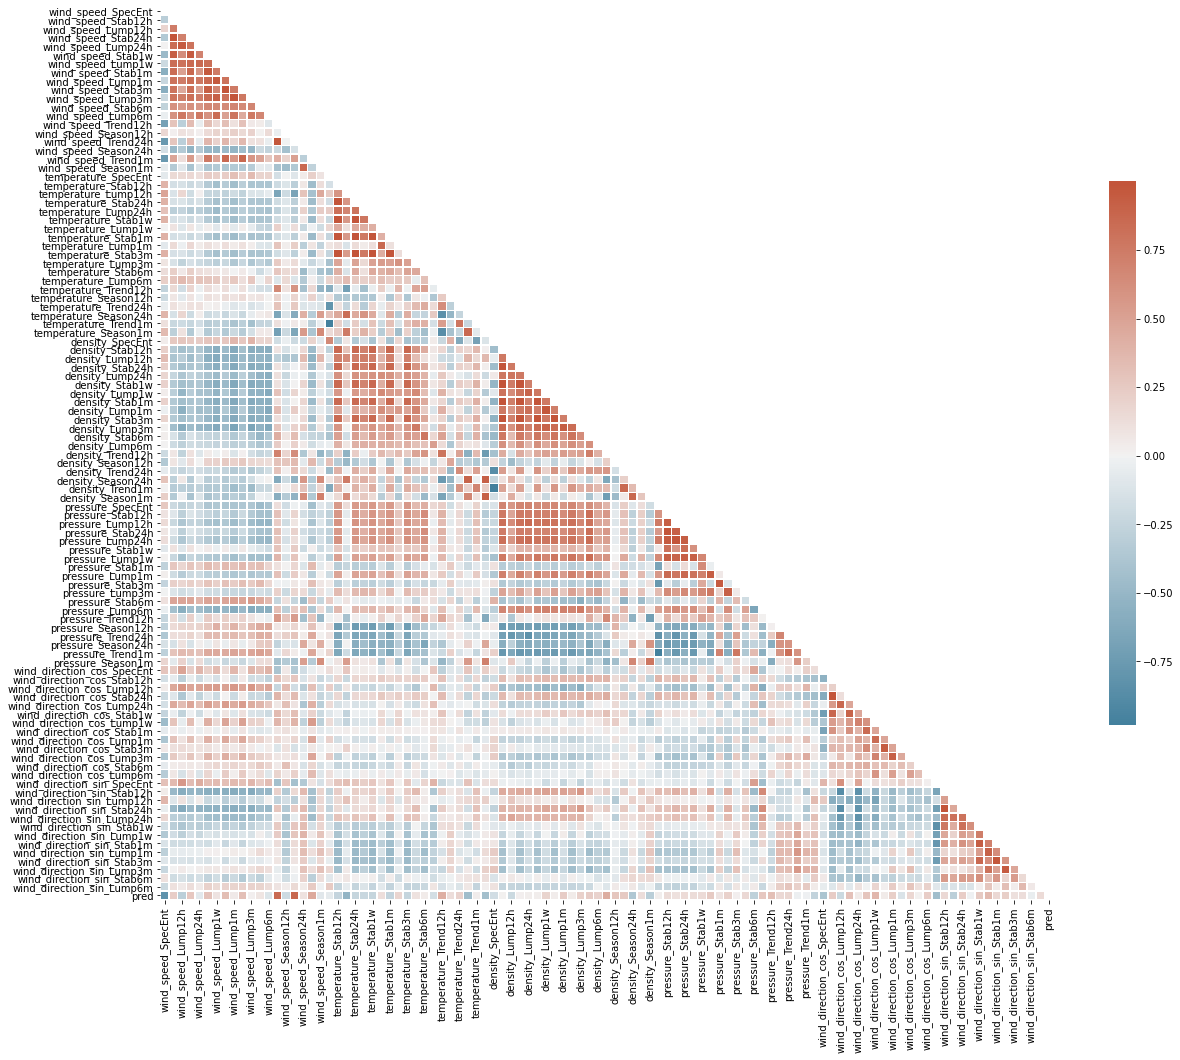

In [10]:
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(20, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


In [8]:
for v in data.columns:
    print(v)

wind_speed_SpecEnt
wind_speed_Stab12h
wind_speed_Lump12h
wind_speed_Stab24h
wind_speed_Lump24h
wind_speed_Stab1w
wind_speed_Lump1w
wind_speed_Stab1m
wind_speed_Lump1m
wind_speed_Stab3m
wind_speed_Lump3m
wind_speed_Stab6m
wind_speed_Lump6m
wind_speed_Trend12h
wind_speed_Season12h
wind_speed_Trend24h
wind_speed_Season24h
wind_speed_Trend1m
wind_speed_Season1m
temperature_SpecEnt
temperature_Stab12h
temperature_Lump12h
temperature_Stab24h
temperature_Lump24h
temperature_Stab1w
temperature_Lump1w
temperature_Stab1m
temperature_Lump1m
temperature_Stab3m
temperature_Lump3m
temperature_Stab6m
temperature_Lump6m
temperature_Trend12h
temperature_Season12h
temperature_Trend24h
temperature_Season24h
temperature_Trend1m
temperature_Season1m
density_SpecEnt
density_Stab12h
density_Lump12h
density_Stab24h
density_Lump24h
density_Stab1w
density_Lump1w
density_Stab1m
density_Lump1m
density_Stab3m
density_Lump3m
density_Stab6m
density_Lump6m
density_Trend12h
density_Season12h
density_Trend24h
density_S

In [12]:
model = GLM.from_formula(f'pred ~ wind_speed_Trend12h + wind_speed_SpecEnt', data)
result = model.fit()
print(result.summary())
print('R2:', 1-result.deviance/(len(data)-1)*np.var(sample[:,1]))

                 Generalized Linear Model Regression Results                  
Dep. Variable:                   pred   No. Observations:                63305
Model:                            GLM   Df Residuals:                    63302
Model Family:                Gaussian   Df Model:                            2
Link Function:               identity   Scale:                        0.095987
Method:                          IRLS   Log-Likelihood:                -15646.
Date:                Thu, 29 Oct 2020   Deviance:                       6076.2
Time:                        11:20:09   Pearson chi2:                 6.08e+03
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               6.8799    

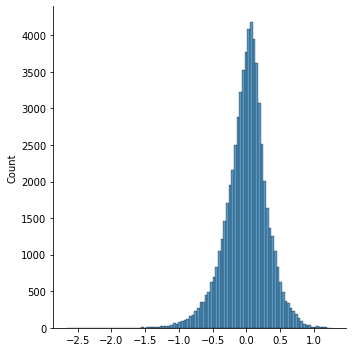

In [13]:

sns.displot(result.resid_response,bins=100);

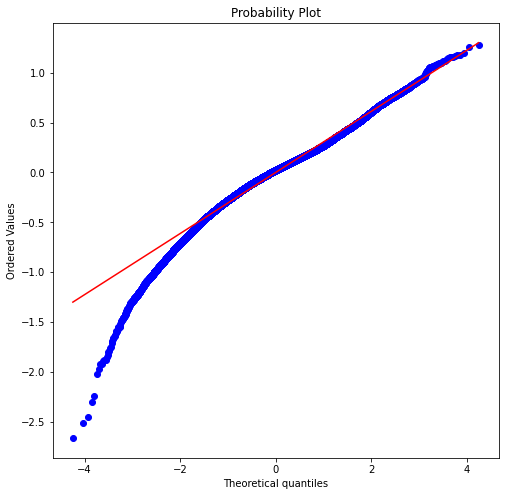

In [14]:
fig, ax = plt.subplots(figsize=(8,8))
stats.probplot(result.resid_response, plot=plt);

In [15]:
for v in data.columns:
    if v != 'pred':
        model = GLM.from_formula(f'pred ~ {v}', data)
        result = model.fit()
        print(f' {v} - R2:', 1-result.deviance/(len(data)-1)*np.var(sample[:,1]))    

 wind_speed_SpecEnt - R2: 0.8972875612583595
 wind_speed_Stab12h - R2: 0.6981093792217845
 wind_speed_Lump12h - R2: 0.7102088283462631
 wind_speed_Stab24h - R2: 0.7036808517288495
 wind_speed_Lump24h - R2: 0.6833135287778291
 wind_speed_Stab1w - R2: 0.7102739996702765
 wind_speed_Lump1w - R2: 0.6838829135290041
 wind_speed_Stab1m - R2: 0.7158469742021174
 wind_speed_Lump1m - R2: 0.682333399727576
 wind_speed_Stab3m - R2: 0.7147973741770504
 wind_speed_Lump3m - R2: 0.6815012411848316
 wind_speed_Stab6m - R2: 0.6837443859404292
 wind_speed_Lump6m - R2: 0.6853023633606631
 wind_speed_Trend12h - R2: 0.9118143144034976
 wind_speed_Season12h - R2: 0.6936351945538011
 wind_speed_Trend24h - R2: 0.9228970390908111
 wind_speed_Season24h - R2: 0.6842272762388215
 wind_speed_Trend1m - R2: 0.7497220586643469
 wind_speed_Season1m - R2: 0.6838834688816788
 temperature_SpecEnt - R2: 0.6828248056306729
 temperature_Stab12h - R2: 0.7008812721635578
 temperature_Lump12h - R2: 0.765797219775638
 temperatu

In [16]:
for m in measure.measures:
    form = ''
    for c in data.columns:
        if m in c:
            form += f'{c} +'
    form = form[:-2]
    model = GLM.from_formula(f'pred ~ {form}', data)
    result = model.fit()
    print(f' {m} - R2:', 1-result.deviance/(len(data)-1)*np.var(sample[:,1]))        

 SpecEnt - R2: 0.9299979958094776
 Stab12h - R2: 0.838149053175948
 Lump12h - R2: 0.8002409808107702
 Stab24h - R2: 0.8602079661880726
 Lump24h - R2: 0.7307900249312684
 Stab1w - R2: 0.8742064149163465
 Lump1w - R2: 0.8346293256330946
 Stab1m - R2: 0.8652963275862989
 Lump1m - R2: 0.7659847340571437
 Stab3m - R2: 0.8556055911008562
 Lump3m - R2: 0.7437391537698534
 Stab6m - R2: 0.7584701998562081
 Lump6m - R2: 0.7590273315920596
 Trend12h - R2: 0.9323230619443883
 Season12h - R2: 0.7328090694859699
 Trend24h - R2: 0.9249572534203541
 Season24h - R2: 0.7792079756345054
 Trend1m - R2: 0.7877120773328915
 Season1m - R2: 0.76960102213101


In [17]:
for v in measure.variables:
    form = ''
    for c in data.columns:
        if v in c:
            form += f'{c} +'
    form = form[:-2]
    model = GLM.from_formula(f'pred ~ {form}', data)
    result = model.fit()
    print(f' {v} - R2:', 1-result.deviance/(len(data)-1)*np.var(sample[:,1]))     

 wind_speed - R2: 0.9580310717450328
 temperature - R2: 0.8273857312605499
 density - R2: 0.8197045630563002
 pressure - R2: 0.8186241773726277
 wind_direction_cos - R2: 0.8453102981418709
 wind_direction_sin - R2: 0.8411960132296084


In [18]:

form = ''
for c in data.columns:
    if c != 'pred':
        form += f'{c} +'
form = form[:-2]
model = GLM.from_formula(f'pred ~ {form}', data)
result = model.fit()
print(result.summary())
print(f' R2:', 1-result.deviance/(len(data)-1)*np.var(sample[:,1]))     

                 Generalized Linear Model Regression Results                  
Dep. Variable:                   pred   No. Observations:                63305
Model:                            GLM   Df Residuals:                    63202
Model Family:                Gaussian   Df Model:                          102
Link Function:               identity   Scale:                        0.048717
Method:                          IRLS   Log-Likelihood:                 5870.9
Date:                Thu, 29 Oct 2020   Deviance:                       3079.0
Time:                        11:20:28   Pearson chi2:                 3.08e+03
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

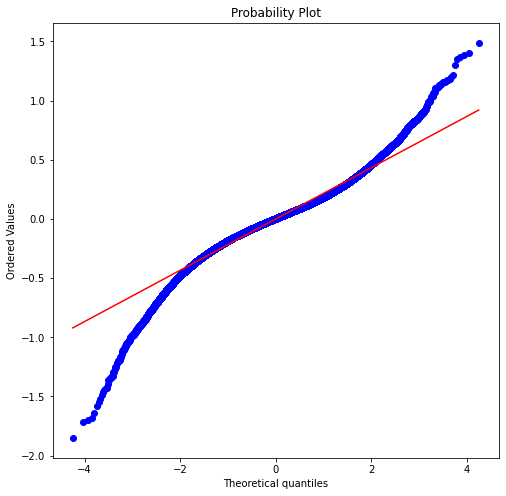

In [19]:
fig, ax = plt.subplots(figsize=(8,8))
stats.probplot(result.resid_response, plot=plt);

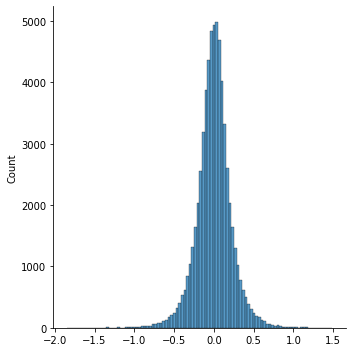

In [20]:
sns.displot(result.resid_response,bins=100);

Text(0, 0.5, 'Residuals')

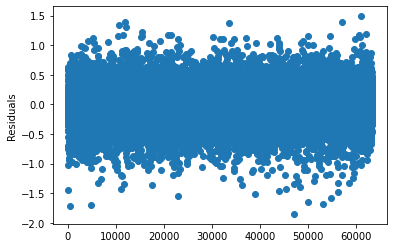

In [21]:
fig, ax = plt.subplots()
ax.scatter( range(result.resid_response.shape[0]),result.resid_response)
ax.hlines(0, 0, 1)
ax.set_ylabel('Residuals')


Text(0, 0.5, 'Residuals')

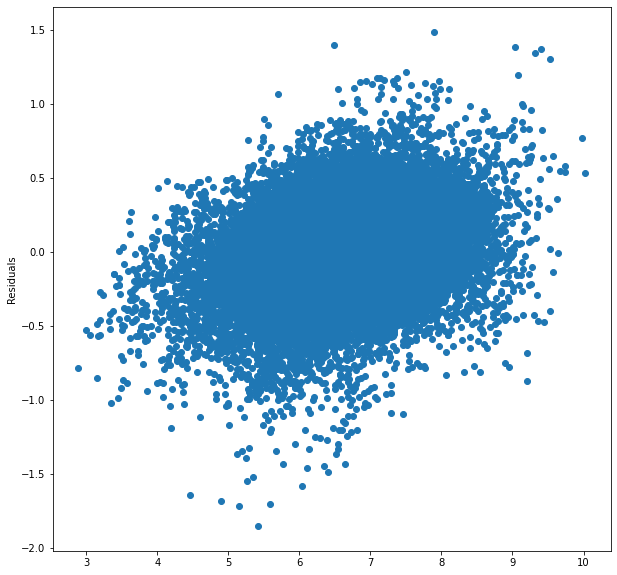

In [22]:
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter( data['pred'],result.resid_response)
ax.set_ylabel('Residuals')

In [23]:
pred = result.predict(data)

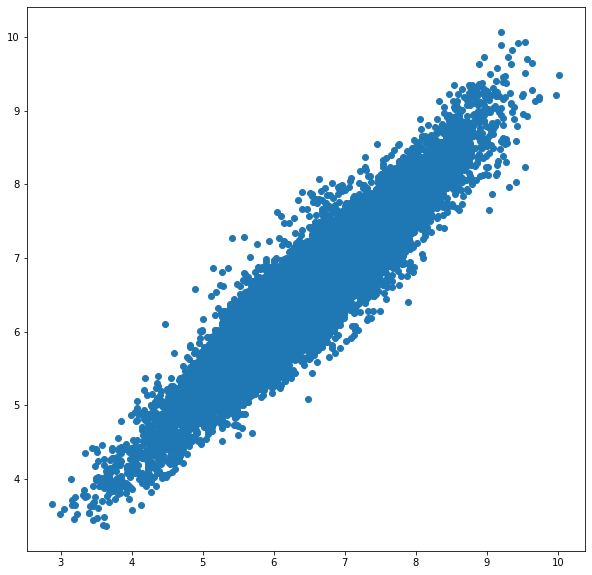

In [24]:
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter( data['pred'], pred)


In [25]:
lnvars = []
lvars = [v for v in data.columns]

In [41]:
form = ''
print(len(lvars))
for c,p in zip(lvars, result.pvalues):
    if c != 'pred' and p<0.05:
        form += f'{c} +'
        lnvars.append(c) 
form = form[:-2]
model = GLM.from_formula(f'pred ~ {form}', data)
result = model.fit()
print(result.summary())
print(f' R2:', 1-result.deviance/(len(data)-1)*np.var(sample[:,1]))    
lvars=lnvars
lnvars = []

38
                 Generalized Linear Model Regression Results                  
Dep. Variable:                   pred   No. Observations:                63305
Model:                            GLM   Df Residuals:                    63266
Model Family:                Gaussian   Df Model:                           38
Link Function:               identity   Scale:                        0.062961
Method:                          IRLS   Log-Likelihood:                -2279.5
Date:                Thu, 29 Oct 2020   Deviance:                       3983.3
Time:                        11:21:53   Pearson chi2:                 3.98e+03
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept        

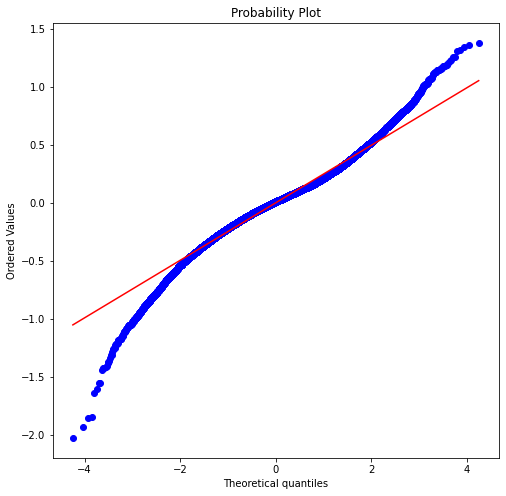

In [42]:
fig, ax = plt.subplots(figsize=(8,8))
stats.probplot(result.resid_response, plot=plt);

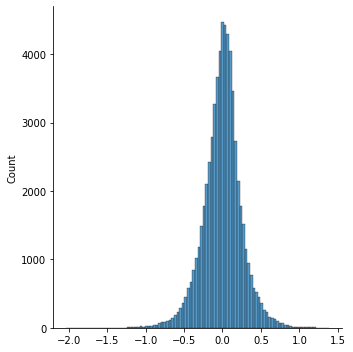

In [43]:
sns.displot(result.resid_response,bins=100);

Text(0, 0.5, 'Residuals')

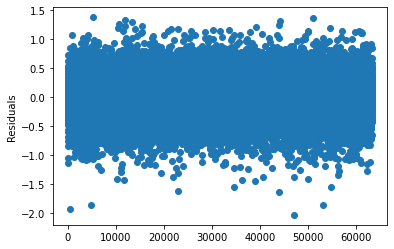

In [44]:
fig, ax = plt.subplots()
ax.scatter( range(result.resid_response.shape[0]),result.resid_response)
ax.hlines(0, 0, 1)
ax.set_ylabel('Residuals')

Text(0, 0.5, 'Residuals')

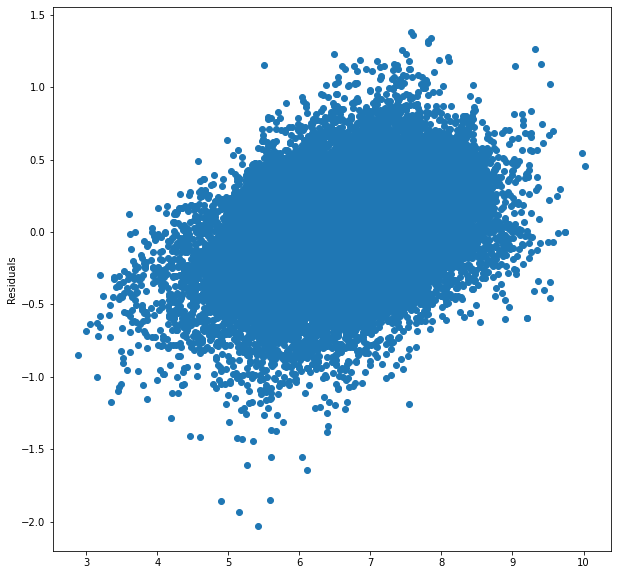

In [45]:
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter( data['pred'],result.resid_response)
ax.set_ylabel('Residuals')

In [47]:
pred = result.predict(data)

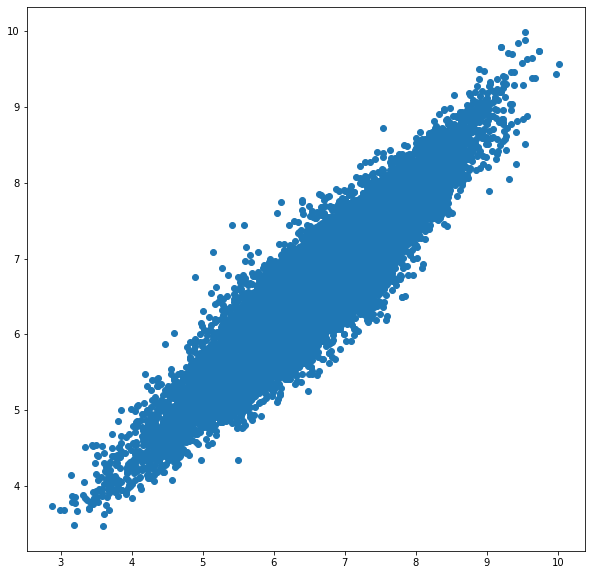

In [48]:
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter( data['pred'], pred)

In [9]:
data.shape

(63311, 103)

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.inspection import permutation_importance, partial_dependence,PartialDependenceDisplay,plot_partial_dependence
from sklearn.model_selection import train_test_split

In [10]:
data

,wind_speed_SpecEnt,wind_speed_Stab12h,wind_speed_Lump12h,wind_speed_Stab24h,wind_speed_Lump24h,wind_speed_Stab1w,wind_speed_Lump1w,wind_speed_Stab1m,wind_speed_Lump1m,wind_speed_Stab3m,...,wind_direction_sin_Lump24h,wind_direction_sin_Stab1w,wind_direction_sin_Lump1w,wind_direction_sin_Stab1m,wind_direction_sin_Lump1m,wind_direction_sin_Stab3m,wind_direction_sin_Lump3m,wind_direction_sin_Stab6m,wind_direction_sin_Lump6m,pred
0,9.281605,3.987378,1.094844,3.545525,1.192217,2.421650,0.791178,2.027530,0.453853,1.731335,...,0.156884,0.251774,0.109506,0.196876,0.083307,0.163659,0.058069,0.066786,0.009931,8.613065
1,10.810930,3.332326,0.830316,2.820038,0.961268,1.390150,0.608513,0.829672,0.393309,0.618716,...,0.274555,0.357378,0.179256,0.266923,0.113138,0.217142,0.084169,0.095861,0.020547,7.039794
2,10.405916,4.614062,1.278147,4.022244,1.625396,2.352043,1.302289,1.738566,0.685092,1.461236,...,0.198672,0.184849,0.090980,0.125789,0.062368,0.099749,0.054636,0.031731,0.012718,6.935959
3,11.003573,3.171333,0.827160,2.633887,0.875594,1.231953,0.576525,0.752432,0.358373,0.557957,...,0.249490,0.323368,0.154048,0.247030,0.094017,0.208301,0.065630,0.092038,0.019945,6.200284
4,10.835317,2.783113,0.677857,2.415371,0.746548,1.264043,0.556578,0.894150,0.406514,0.749873,...,0.217127,0.257296,0.105583,0.145339,0.047337,0.116012,0.030126,0.060486,0.019933,6.980136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63341,10.780357,3.027046,0.685006,2.636185,0.785483,1.345401,0.555608,0.879759,0.292298,0.681896,...,0.226406,0.279967,0.105059,0.148456,0.041299,0.098678,0.021859,0.063114,0.016962,6.841484
63342,10.691287,2.965909,0.685674,2.561780,0.789227,1.326163,0.558677,0.932061,0.320803,0.750336,...,0.210988,0.272298,0.106023,0.145218,0.051668,0.095335,0.033400,0.061391,0.024797,6.933512
63343,11.376815,3.804691,1.119677,3.365854,1.162840,1.856181,0.839245,1.265443,0.587863,1.070147,...,0.200347,0.235017,0.103883,0.162923,0.077418,0.137490,0.062496,0.059819,0.021349,6.115584
63344,10.945282,3.529274,0.877531,3.070142,1.027543,1.526644,0.700623,0.953748,0.383692,0.672510,...,0.250200,0.289482,0.105147,0.164892,0.039925,0.120679,0.024497,0.069769,0.014849,6.984812


In [11]:
y = data['pred'].to_numpy(copy=True)

In [16]:
X = data.loc[:,'wind_speed_SpecEnt':'wind_direction_sin_Lump6m'].to_numpy(copy=True)

In [22]:
X.shape
fnames = list(data.columns)
fnames.pop()
fnames = np.array(fnames)

(63311, 102)

'pred'

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [24]:
lr = LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_test, y_test)

LinearRegression()

0.9123078486201786

In [45]:
result = permutation_importance(lr, X_train, y_train, n_repeats=10,
                                random_state=42)
perm_sorted_idx = result.importances_mean.argsort()

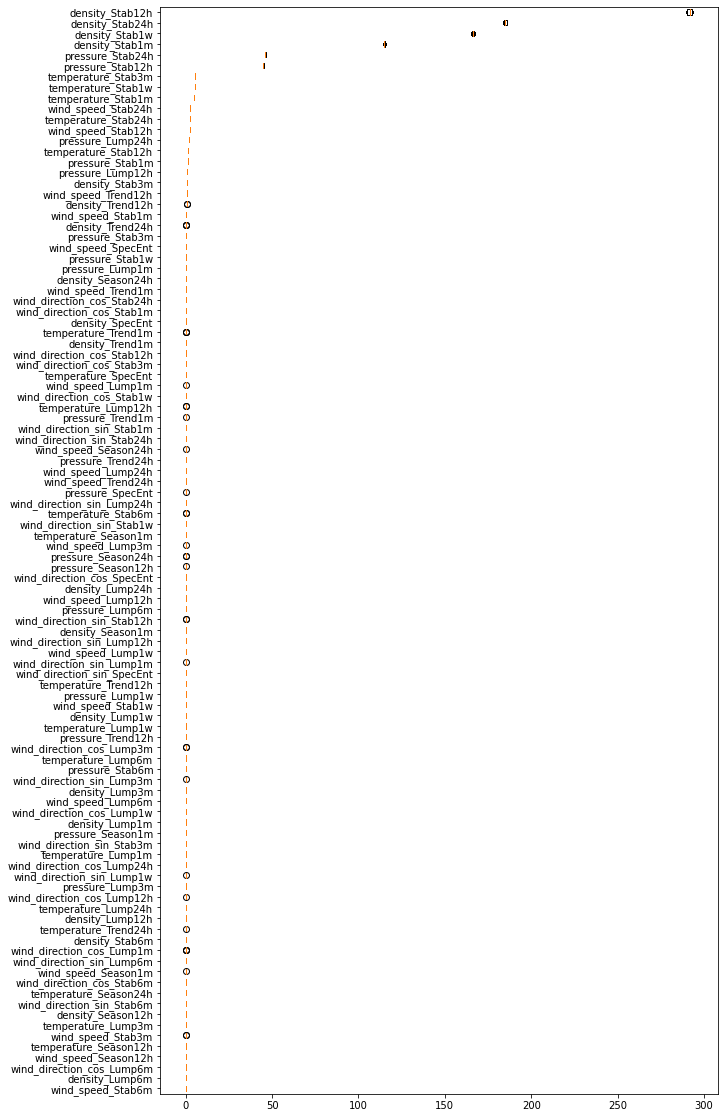

In [65]:
plt.figure(figsize=(10,20))
plt.boxplot(result.importances[perm_sorted_idx].T, vert=False,
           labels=fnames[perm_sorted_idx]);


In [44]:
model = GLM.from_formula(f'pred ~ density_Stab12h+density_Stab24h+density_Stab1w+density_Stab1m+pressure_Stab12h+pressure_Stab24h+wind_speed_Stab24h', data)
result = model.fit()
print(result.summary())
print('R2:', 1-result.deviance/(len(data)-1)*np.var(sample[:,1]))

                 Generalized Linear Model Regression Results                  
Dep. Variable:                   pred   No. Observations:                63311
Model:                            GLM   Df Residuals:                    63303
Model Family:                Gaussian   Df Model:                            7
Link Function:               identity   Scale:                         0.46597
Method:                          IRLS   Log-Likelihood:                -65657.
Date:                Thu, 12 Nov 2020   Deviance:                       29497.
Time:                        13:42:30   Pearson chi2:                 2.95e+04
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              5.2879      0

In [49]:
partial_dependence(lr, features=[0], X=X_test, percentiles=(0, 1), grid_resolution=10)

(array([[8.92541866, 8.5748472 , 8.22427574, 7.87370427, 7.52313281,
         7.17256135, 6.82198988, 6.47141842, 6.12084696, 5.77027549]]),
 [array([ 7.86596586,  8.37011568,  8.87426551,  9.37841534,  9.88256516,
         10.38671499, 10.89086482, 11.39501464, 11.89916447, 12.40331429])])

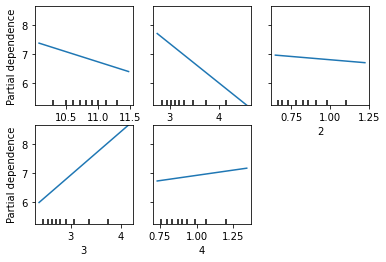

In [56]:
plot_partial_dependence(lr, X_test, [0,1,2,3,4],
                        n_jobs=3, grid_resolution=50)

In [59]:
result.importances_mean.shape

(102,)

In [61]:
fnames.shape

(102,)

In [66]:
result.importances_mean

array([3.09514484e-01, 2.35373445e+00, 2.60766684e-02, 2.74343015e+00,
       7.68488068e-02, 1.37963531e-02, 1.82710660e-02, 4.57878285e-01,
       1.47761597e-01, 5.76645187e-04, 4.26384830e-02, 3.40066584e-06,
       8.66726247e-03, 5.83701002e-01, 1.93387314e-04, 7.22521127e-02,
       8.86395047e-02, 2.77794614e-01, 1.33368296e-03, 1.63496994e-01,
       1.43153830e+00, 1.12949701e-01, 2.70768161e+00, 3.28747195e-03,
       5.45900285e+00, 1.27922378e-02, 4.68780839e+00, 5.80285332e-03,
       5.54179469e+00, 6.29828183e-04, 5.47447121e-02, 1.13026165e-02,
       1.55491032e-02, 2.26209209e-04, 2.80465712e-03, 1.24200001e-03,
       2.26294970e-01, 4.90017374e-02, 2.34411218e-01, 2.91560787e+02,
       2.85008479e-03, 1.84877954e+02, 3.11462457e-02, 1.66279536e+02,
       1.29250373e-02, 1.14927217e+02, 7.25489954e-03, 6.76452328e-01,
       8.86951489e-03, 2.34422106e-03, 4.64446632e-06, 4.92519773e-01,
       6.34362864e-04, 4.43942267e-01, 2.81244952e-01, 1.99922991e-01,
      

In [67]:
from scipy.stats import spearmanr
from scipy.cluster import hierarchy

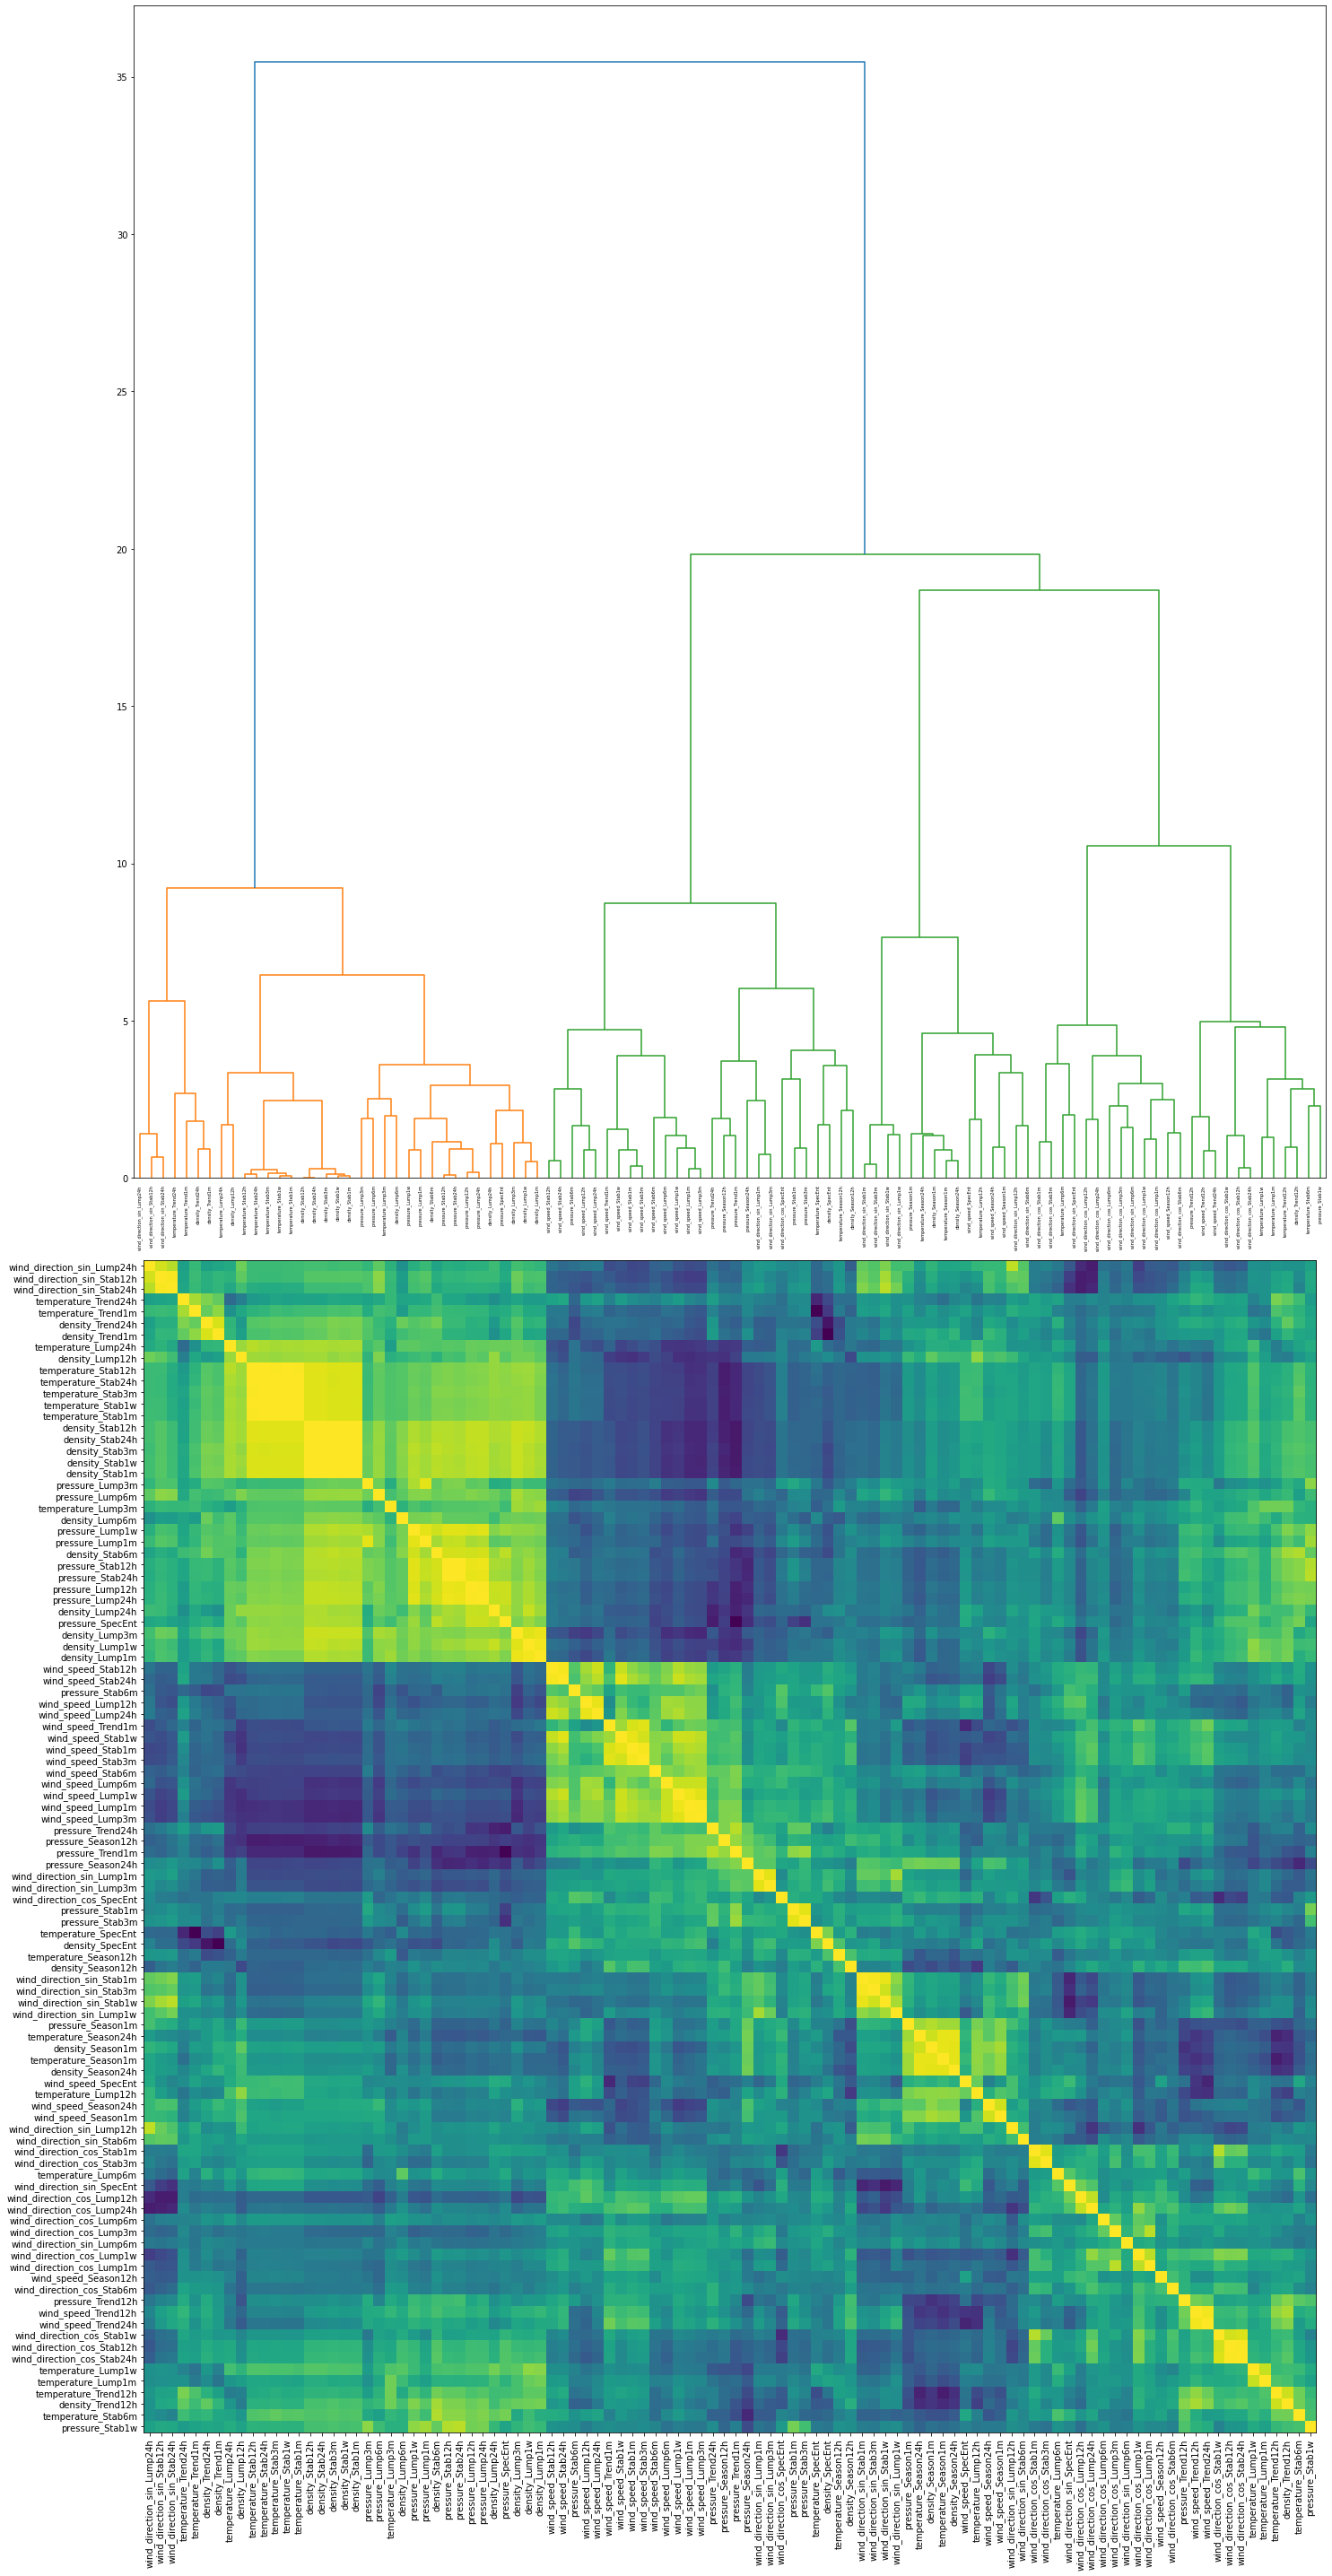

In [74]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 40))
corr = spearmanr(X).correlation
corr_linkage = hierarchy.ward(corr)
dendro = hierarchy.dendrogram(
    corr_linkage, labels=fnames, ax=ax1, leaf_rotation=90
)
dendro_idx = np.arange(0, len(dendro['ivl']))

ax2.imshow(corr[dendro['leaves'], :][:, dendro['leaves']])
ax2.set_xticks(dendro_idx)
ax2.set_yticks(dendro_idx)
ax2.set_xticklabels(dendro['ivl'], rotation='vertical')
ax2.set_yticklabels(dendro['ivl'])
fig.tight_layout();